In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive
%cd My Drive
%cd Phase Project
!ls

/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/Phase Project
 checkpoint		        csv_folder		    Pase.ipynb
'CIFAR10 (1).ipynb'	        data			   'Phase2 Data.ipynb'
'CIFAR10-Fixed feature.ipynb'  'Data-Phase Project.ipynb'   Phase-2.ipynb
 CIFAR10.ipynb		        Dataset			    Untitled0.ipynb
 CIFAR10ipynb.ipynb	        OIDv4_ToolKit


In [ ]:
#@title
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 20.80 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
#@title
%cd OIDv4_ToolKit

/content/gdrive/My Drive/Phase Project/OIDv4_ToolKit


In [ ]:
#@title
!pip3 install -r requirements.txt

In [ ]:
#@title
!python3 main.py -h

In [ ]:
#@title
!python3 main.py downloader --classes Dog Beetle Bee Parrot Ladybug Starfish Tortoise Elephant Rhinoceros Owl Fox Falcon Bat Reptile Frog Koala Goat Swan Woodpecker Alpaca Polar_bear --type_csv all --image_IsOccluded 0 --image_IsGroupOf 0 --limit 550

In [ ]:
import torch
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
import os


1853

In [ ]:
!python3 main.py downloader --classes Cat Dolphin Turtle Monkey --type_csv all --image_IsOccluded 0 --image_IsGroupOf 0 --limit 550

python3: can't open file 'main.py': [Errno 2] No such file or directory


In [ ]:
!python3 main.py downloader --classes Snail --type_csv all --image_IsOccluded 0 --image_IsGroupOf 0 --limit 550

In [ ]:
!python3 main.py downloader --classes Rabbit --type_csv all --image_IsOccluded 0 --image_IsGroupOf 0 --limit 550

In [ ]:
import pandas as pd

In [ ]:
trainset = datasets.ImageFolder(root = "/content/gdrive/My Drive/Phase Project/Dataset/train")
valset = datasets.ImageFolder(root = "/content/gdrive/My Drive/Phase Project/Dataset/validation")
testset = datasets.ImageFolder(root = "/content/gdrive/My Drive/Phase Project/Dataset/test")

In [ ]:
print(len(trainset))
print(len(valset))
print(len(testset))

8300
1321
2573


In [ ]:
class_description = '/content/gdrive/My Drive/Phase Project/csv_folder/class-descriptions-boxable.csv'
path_annotation =  '/content/gdrive/My Drive/Phase Project/csv_folder/train-annotations-bbox.csv'
class_description = pd.read_csv(class_description)
train_annotations = pd.read_csv(path_annotation)
len(train_annotations)

14610229

In [ ]:
class_description.head()


,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [ ]:
T = train_annotations.copy()
T1 = pd.DataFrame(train_annotations['IsOccluded'])
T2 = T[T['IsOccluded'] == 0]
train_annotations = T2[T2['IsGroupOf'] == 0]
train_annotations.reset_index(drop = True)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/0284d,1,0.528125,0.923437,0.675000,0.964063,0,0,0,0,0
3,000002b66c9c498e,xclick,/m/04bcr3,1,0.064062,0.492188,0.889063,0.993750,0,0,0,0,0
4,000002b66c9c498e,xclick,/m/04bcr3,1,0.301562,0.990625,0.462500,0.595312,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857287,ffffebddbb8bba21,xclick,/m/0242l,1,0.000000,0.999375,0.000625,0.999375,0,1,0,0,0
4857288,fffffdaec951185d,activemil,/m/03bt1vf,1,0.566875,0.926250,0.064728,0.985929,0,1,0,0,0
4857289,fffffdaec951185d,xclick,/m/01xyhv,1,0.951875,0.999375,0.271107,0.719512,0,1,0,0,0
4857290,fffffdaec951185d,xclick,/m/0dzct,1,0.313750,0.410000,0.091932,0.287993,0,0,0,0,0


In [ ]:
imagepath_train = '/content/gdrive/My Drive/Phase Project/Dataset/train'
import os
import glob


classes = []
for filename in os.listdir(imagepath_train):
    classes.append(filename)
data = []
datajpg = []
classdic = {}
name_class = []
for c in classes:
    data2 = []
    for filename in os.listdir(os.path.join(imagepath_train,c )):
        if filename.endswith("jpg"):
           datajpg.append(filename)
           filename = filename[0:-4]
           data.append(filename)
           data2.append(filename)
           name_class.append(c)
           classdic[c] = data2
          
ImageID = pd.DataFrame(data)
ImageID_ = pd.DataFrame(datajpg)


name_class = pd.DataFrame(name_class)
ImageID_['class'] = name_class
ImageID['class'] = name_class
classdic
dic = pd.DataFrame.from_dict(classdic, orient = 'index')
Imagedata = dic.transpose()
class_num_im = Imagedata.count()

In [ ]:
len(data)

8300

In [ ]:
Imagedata

,Dog,Beetle,Bee,Parrot,Ladybug,Starfish,Tortoise,Elephant,Rhinoceros,Owl,Falcon,Bat,Frog,Goat,Swan,Polar bear,Cat,Monkey,Snail,Rabbit
0,0014169878a84bd5,00237b721afb7a6c,008556630ca207f0,0001b21c9b919d48,0008e45ffa65d992,0042fe66a2263831,001ef0f9885fa3d4,000bf3863580a0a0,002b346c9ff726c6,0039e9930110f20f,0001e6adc4fbab0c,000907815d95449f,00019a8fe343a53e,000ad6c520be9ec5,003ce6309d13dde0,006a0958123deab1,002921d5385824be,011b496d23d11acf,0040a4fe1c4c28ff,004b1faa4c70f07f
1,001b283e93591cf4,0030630934b54e64,009b890887c6572c,0005fd0beaedf55c,00423f9c5cbf2794,009a6a72c799d9d4,00ba381a304dd39d,000f0d2fe4e5fde4,00a91238f4559e64,0040d7f1676ab75c,000a3de7da1df704,0039849788c3730d,00257249d86b4e27,0044547733c13689,0052a7149be9a6b5,0100734567753372,002ba651da665f7a,0136030c6137f6df,00e860a48c2a9158,004b15cae564f42a
2,00267e0c8e2eb09a,007cdc1a7e89b5cc,00ae7c2813ac734e,0028a3fc928dd59f,006d7be94222587a,019c299e42cba407,00c0a7bf94467de6,003a5d2cbb797b7c,00ce44590d02a7d4,0049975c7077927e,0031229b7741a1d7,02b174e383edd13d,003cce93c85f10f0,014c361b3db1eef0,008648e2459d0c60,01399dab5c3366e4,00478d2ee36ede12,016a832c6088b543,010b18213a3b8f0e,00d45b5fe13eedaf
3,00287bf8ccc459fa,00f07bd2129af0fc,00c75b9f955ca05d,003a9198b920396d,008e9e83452915be,01c75e408dd436ff,00da0ea064179c85,0062f2f5243acf12,0109a40779eeda31,007856a72e863b13,00477f027254668d,02b7fa0c286aa448,006f7e7d6ad9e4ff,02117a44d7b80f6b,008824b729c3aab4,013aeee02fc1aaca,00616b368bd46090,016e7365231c513c,0195361b3ace28d5,00e1e0c426822274
4,002b020146637617,012e30bfa83aba40,011339fc84d31bad,0042699f729f9c08,0127a046090723bc,01ffb6b84ebc4b3c,00ef878326d8b8bc,0065ea6e1c2a2425,01742ec399d1cca0,0086e66ce10fb5ba,0066f4d8f05df0a4,03c32baadf23465f,00ee79abda9e9a20,0237eee9af8a9f73,00d9ff28ff76141e,01c1c05247156395,006c528316553ddd,0171abca684d1d64,01b3faf3e3d7b42b,0280971a3c7ba8c7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ff467cc06fb614a3,fd600401da4f098f,None,None,None,None,None,None,None,fc479df7cd149556,fbdea6169bb0e8b6,None,fe7f66a14507c6f8,None,None,None,fe4b3a3a557ef70a,fe8b052bc1b3a12d,None,None
546,ff7e4fcf7c58c674,fd6664615260c3a6,None,None,None,None,None,None,None,fc680b851f4f3dc5,fc857f64e30630f5,None,fe8870e7ec5a2719,None,None,None,fe6a1941de1a08dc,fe9322f8ddbd16bb,None,None
547,ffa1d11691d42e56,fe1e904d1f3862f8,None,None,None,None,None,None,None,fd2b82130d839be1,fcfb41127489002a,None,feba7bf1b8242297,None,None,None,fe9e8c19985bd0b0,fea4ae74bf1aa0c5,None,None
548,fff7e50f2824afe0,ff2045ca616cdf91,None,None,None,None,None,None,None,ff72ae7807823253,fde3bf42faea74de,None,fed9a454760077ee,None,None,None,ff224a48e8e3ee19,ff31ed14fff3b277,None,None


In [ ]:
class_num_im

Dog           550
Beetle        550
Bee           452
Parrot        497
Ladybug       408
Starfish      287
Tortoise      516
Elephant      310
Rhinoceros    257
Owl           550
Falcon        550
Bat           208
Frog          550
Goat          223
Swan          269
Polar bear    296
Cat           550
Monkey        550
Snail         400
Rabbit        327
dtype: int64

In [ ]:
imagepath_test = '/content/gdrive/My Drive/Phase Project/Dataset/test'
import os
import glob

data_test = []
datajpg_test = []
classdic_test = {}
name_class =[]
for c in classes:
    data2 = []
    for filename in os.listdir(os.path.join(imagepath_test,c )):
        if filename.endswith("jpg"):
           datajpg_test.append(filename)
           filename = filename[0:-4]
           data_test.append(filename)
           data2.append(filename)
           classdic_test[c] = data2
           name_class.append(c)
ImageID_test = pd.DataFrame(data_test)
ImageID_test_ =pd.DataFrame(datajpg_test) 
ImageID_test['class']= name_class
ImageID_test_['class']= name_class
classdic_test
dic = pd.DataFrame.from_dict(classdic_test, orient = 'index')
Imagedata_test = dic.transpose()
Imagedata_test.count()
Imagedata_test

,Dog,Beetle,Bee,Parrot,Ladybug,Starfish,Tortoise,Elephant,Rhinoceros,Owl,Falcon,Bat,Frog,Goat,Swan,Polar bear,Cat,Monkey,Snail,Rabbit
0,004130acea29204f,00bac5ba29b06beb,0d0bdcc1dcd64c95,04fb867df7ccacb0,01d4fc65683b0798,064f56fafeb7b9db,023b4802f26b54e6,028f8db193a85ecf,23a8613d995053f2,017ae4de3271e9a9,0187938d277188fa,10ebec1071c3ef8b,06ff1bb32dd9c8aa,00dbabf445242ba3,0142d1fc46883a7b,049e7cfdcffdfbe5,00b6be538644be0b,01203fe50f8dcab0,03ba49dd29f08dc4,00fd547449716c1a
1,00802a215c4359e6,00bf63ce253deb33,132e66dc9d77a9c1,05211907d51c137d,0ebf7bb90c689045,0a5132b5298cf774,05373b7f9363f1b5,0ba8f4463ed0513f,27e491edd2b724f0,03dba7c7db0dc8f4,03715c7dd19b1f36,1377f2b48980ed7b,078fa6bec8dd4a99,0de810360aa4ab15,033a2d3f9eac6188,0c3f3e55551d7a38,018376cd9ec14643,01ae716bfbe9be25,065dc37cbbfcd59c,02b8cbb00f69108b
2,029a799730eb8b30,0397e41deb089f40,1732344e020b0c55,085f62e2375ab7ed,10d0d782f3e71a79,102114248cf8907e,061bad48d5f83750,0d01927ad866d3e3,283263de5f68530b,04a79ce6de6e3719,0620fe4c9e29ab20,169ddc9ebc57060c,0c87c5394666da7b,0e339658d17b8711,086cd2c05b9b7b3f,12a69657c24293e9,017c776a67956dd9,022c71451277faa4,073511a9ae654577,030212548c1656e6
3,03be3d825bdcb947,091607261c083036,1d47fc722e9dbe23,094471e37d9fccfe,1957b2ed3b8bc682,116fb7237712f45b,07690af13c93ea1b,1de68e44f26155a7,2d0ec633c59c338f,102e9fefe472e7a4,06bcc09321656cc5,22322b52963625cc,14067077e695b7d5,10abae5a94fe5368,08be9f62482fa5cf,13e6c2ad1cbc96a5,01cc07838fc28a68,0308c72604a9fdb4,075bac26657e4198,04b86928b5e54b39
4,042b5b3455706904,0c3b00ba25829145,251fa3ed30dec32a,0cc91a1ee964030b,24bad3bd398e13a4,120a26a3ac1383cf,0ca327615c66417a,226693882e6bfe60,2e3a7f4b6057b388,1253baf5755d43aa,07301815c8038143,35bac7d71f7d3129,18e1eb2d2d2e1042,153d164e827a6716,0ea78a8ea4e50ab1,23165e01ebdea3c4,01e836367cfb0c76,043c5c5448186b26,0963a5ddb03457bf,072b8fd82919ab3e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,fa7f788157b981a7,None,None,None
546,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,fbac116dfb2d59ac,None,None,None
547,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,fd43dd823acbe8ef,None,None,None
548,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,fe27af58dc0ce877,None,None,None


In [ ]:
import numpy as np
import random
Imagedata_test.head()
#Restricting test data to atmost 100 images
Imagedata_test = Imagedata_test.head(100)
class_num_im_test = Imagedata_test.count()
class_num_im_test

Dog           100
Beetle        100
Bee            56
Parrot        100
Ladybug        30
Starfish       48
Tortoise       96
Elephant       33
Rhinoceros     30
Owl            69
Falcon        100
Bat            22
Frog           74
Goat           77
Swan           61
Polar bear     56
Cat           100
Monkey        100
Snail         100
Rabbit        100
dtype: int64

In [ ]:
imagepath_val = '/content/gdrive/My Drive/Phase Project/Dataset/validation'
import os
import glob

data_val = []
datajpg_val = []
classdic_val = {}
name_class= []
for c in classes:
    data2 = []
    for filename in os.listdir(os.path.join(imagepath_val,c )):
        if filename.endswith("jpg"):
           datajpg_val.append(filename)
           filename = filename[0:-4]
           data_val.append(filename)
           data2.append(filename)
           classdic_val[c] = data2
           name_class.append(c)
ImageID_val = pd.DataFrame(data_val)
ImageID_val_ =pd.DataFrame(datajpg_val) 
ImageID_val['class']= name_class
ImageID_val_['class']= name_class          
classdic_val
dic = pd.DataFrame.from_dict(classdic_val, orient = 'index')
Imagedata_val = dic.transpose()
Imagedata_val

,Dog,Beetle,Bee,Parrot,Ladybug,Starfish,Tortoise,Elephant,Rhinoceros,Owl,Falcon,Bat,Frog,Goat,Swan,Polar bear,Cat,Monkey,Snail,Rabbit
0,000c4d66ce89aa69,0128080be1b488d7,03f7fdcd79abe93e,0305bdf30d1d0d2a,1efdff79a8a2062b,0077f8de643853ca,04728d00324ff2af,2a49797aa2bb774a,2661949bb827c036,1d3d4030ac5678b0,02c4928fc4620c87,149fb0f06e3061ae,0133f1385b13e8bf,03052f35d170935d,31128c23066173b7,01439d37d272cf17,0060dfb7f9a468b5,015e65bb33ee3e0e,078f69ac6f49a704,0c77621a9f1183d6
1,0008e425fb49a2bf,0a25fd986539e54d,046228d5312e13c2,07f0faab58f2a31e,20b9c618b9e3ef4b,036cf898c6176afd,1acbb3dbdab656b5,438cb4403beb04ec,2ba168f914b68d64,2531bcca5953b20b,069dd1fac4645473,46d8f45af4daa4ff,02682a455ece74dd,08a8392e4a62443c,4701bf334e869fa6,07ba0d913b713682,00bdb008eb688497,04d28dcc8394f2a9,08a4667bd842a5bb,198649872a9ba7dd
2,0007d6cf88afaa4a,0bb760fdab7cd583,13fb7fd8208a2d18,0ee9b444108eb87b,211c66cb9d9f25de,082fced57a8f6fb9,1c603f404be97d55,44e8f5d1b5e9feee,42db00f3106896f6,28a13aaee905f4ba,12b74f80e629d4db,None,04742ad1e66905b9,09ca65e2cb286877,49712e87a377380c,097690a43a1768cb,039beb511fd1e7f7,0622e338a23e60ac,0bafcb92bc8123db,1c8e7a5c4365598d
3,00493fdf106b5fdf,0efea50f0453a640,1b411a7a22fc4e92,0f340f00491b9231,2b0b21dd601b6ff3,34b8358262d2a434,1d66fa7538e148e9,505f00d8762c07fc,996983a34279806d,2f94574558ff818b,143793332d1085a0,None,04f12bbcec6bb9e1,1386f01e1a917c24,57205d4435df3689,0e44531f622a8144,0413f9c94df7ebcb,0739c6aeefaacead,14ee1d1e5d0c278b,2e136431c66e1378
4,00f5e32f28fc420e,102d28afba48a4b3,24a5751b0f6f6017,1007a5523ecb7878,8f28c2c23a4f63b6,55476396476e706e,213978a9cdac68f0,8a8402b674adb7f9,a0d107477bccb36a,368ee2d0f494078f,192727d0d18719a0,None,0bdbb90d1282fd2d,15151cd3fbdac4dc,62439d385f495f5f,101f2cf89fbcb8cd,03ff0c4a800af9ec,08ba379bdd9b7a70,16391a9289181ff1,2df9d138b884546b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,fe9f0ec0594be278,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
546,fedb4dee21b3299e,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
547,feb6bc4302fa782d,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
548,feecbb187da26ae8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Restricting to 50 images in validation

Imagedata_val.head()
Imagedata_val = Imagedata_val.head(50)
class_num_im_val = Imagedata_val.count()
class_num_im_val

Dog           50
Beetle        40
Bee           16
Parrot        48
Ladybug       13
Starfish      14
Tortoise      28
Elephant      11
Rhinoceros    10
Owl           27
Falcon        37
Bat            2
Frog          26
Goat          23
Swan          13
Polar bear    20
Cat           50
Monkey        50
Snail         29
Rabbit        38
dtype: int64

Number of images in training data: 8300
Number of images in class: Monkey 550
	 image_name: 050e905da90069e2


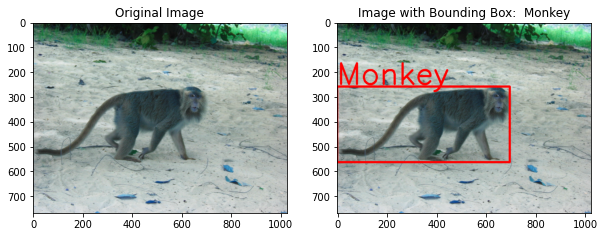

In [ ]:
#Visualizing Images in training data
import cv2
import matplotlib.pyplot as plt

class_ = 'Monkey'

imagepath = '/content/gdrive/My Drive/Phase Project/Dataset/train'
a = np.arange(class_num_im[class_])
random.shuffle(a)
ind = a[1]
im_path = os.path.join(imagepath, class_)
print('Number of images in training data: %d' %(len(data)) )
print('Number of images in class:', class_, class_num_im[class_] )
img_ID = Imagedata[class_][ind]
print('\t image_name: %s' % (img_ID))
image = cv2.imread(os.path.join(im_path, img_ID+'.jpg'))


height, width , num_channels = image.shape
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
bboxs = train_annotations[train_annotations['ImageID']==img_ID]
bbox_img = image.copy()
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    class_series = class_description[class_description['name']==label_name]
    class_name = class_series['class'].values[0]
    cv2.rectangle(bbox_img,(xmin,ymin),(xmax,ymax), (255,0, 0), 8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(bbox_img,class_name,(xmin,ymin-10), font, 4,(255, 0, 0),8)
plt.subplot(1,2,2)
plt.title('Image with Bounding Box:  ' + class_name)
plt.imshow(bbox_img)
plt.show()


In [ ]:
#Label name for each class
label_name = {}
for class_ in classes:
    label1= class_description[class_description['class']== class_]
    label_name[class_] = label1.iloc[0]['name']
    
label_name

{'Bat': '/m/01h44',
 'Bee': '/m/01h3n',
 'Beetle': '/m/020jm',
 'Cat': '/m/01yrx',
 'Dog': '/m/0bt9lr',
 'Elephant': '/m/0bwd_0j',
 'Falcon': '/m/0f6wt',
 'Frog': '/m/09ld4',
 'Goat': '/m/03fwl',
 'Ladybug': '/m/0gj37',
 'Monkey': '/m/08pbxl',
 'Owl': '/m/09d5_',
 'Parrot': '/m/0gv1x',
 'Polar bear': '/m/0633h',
 'Rabbit': '/m/06mf6',
 'Rhinoceros': '/m/03d443',
 'Snail': '/m/0f9_l',
 'Starfish': '/m/01h8tj',
 'Swan': '/m/0dftk',
 'Tortoise': '/m/011k07'}

In [ ]:
#DataFrame for Image ID, BoundingBox coordinates and classname,  to create dictionaries
Frames = []
for class_ in classes:
    I = pd.DataFrame(Imagedata[class_])
    I.columns = ['ImageID']
    I['ClassName'] = class_
    I['LabelName'] = label_name[class_]
    Class_bbox = pd.merge(I, train_annotations,  how ='inner', on = ['ImageID', 'LabelName'])
    Class_bbox = Class_bbox[['ClassName', 'ImageID', 'XMin', 'XMax', 'YMin', 'YMax']]
    print('Number of bounding boxes:', class_ , len(Class_bbox))
    print('Number of Images:', class_ ,len(np.unique(Class_bbox['ImageID'])))
    Frames.append(Class_bbox)

Data = pd.concat(Frames)
Data


Number of bounding boxes: Dog 584
Number of Images: Dog 550
Number of bounding boxes: Beetle 976
Number of Images: Beetle 550
Number of bounding boxes: Bee 501
Number of Images: Bee 452
Number of bounding boxes: Parrot 658
Number of Images: Parrot 497
Number of bounding boxes: Ladybug 430
Number of Images: Ladybug 408
Number of bounding boxes: Starfish 334
Number of Images: Starfish 287
Number of bounding boxes: Tortoise 618
Number of Images: Tortoise 516
Number of bounding boxes: Elephant 345
Number of Images: Elephant 310
Number of bounding boxes: Rhinoceros 294
Number of Images: Rhinoceros 257
Number of bounding boxes: Owl 638
Number of Images: Owl 550
Number of bounding boxes: Falcon 611
Number of Images: Falcon 550
Number of bounding boxes: Bat 307
Number of Images: Bat 208
Number of bounding boxes: Frog 623
Number of Images: Frog 550
Number of bounding boxes: Goat 254
Number of Images: Goat 223
Number of bounding boxes: Swan 338
Number of Images: Swan 269
Number of bounding boxes

,ClassName,ImageID,XMin,XMax,YMin,YMax
0,Dog,0014169878a84bd5,0.059375,0.888750,0.281667,0.742500
1,Dog,001b283e93591cf4,0.088750,0.775625,0.150000,0.999167
2,Dog,00267e0c8e2eb09a,0.164375,0.999375,0.000000,0.999167
3,Dog,00287bf8ccc459fa,0.468750,0.914375,0.000000,0.999124
4,Dog,002b020146637617,0.035625,0.840000,0.000000,0.999062
...,...,...,...,...,...,...
342,Rabbit,f84346cec2bbc7db,0.260625,0.739375,0.016886,0.963415
343,Rabbit,fb478a17dfcc8eb5,0.211268,0.999061,0.103125,0.951875
344,Rabbit,fd8be86a499388e4,0.478750,0.691250,0.287500,0.731250
345,Rabbit,fdfa0658c44455a9,0.131250,0.883125,0.000000,0.999167


In [ ]:
Data.reset_index(drop = True)

Data_train = Data.copy()

In [ ]:
#Number of bounding boxes can be more for an image in this dataset(group of classes)

In [ ]:
#Doing similar for test data and validation data
test_path = '/content/gdrive/My Drive/Phase Project/csv_folder/test-annotations-bbox.csv'
val_path = '/content/gdrive/My Drive/Phase Project/csv_folder/validation-annotations-bbox.csv'


In [ ]:
test_annotations = pd.read_csv(test_path)
val_annotations = pd.read_csv(val_path)

T = test_annotations.copy()
T2 = T[T['IsOccluded'] == 0]
test_annotations = T2[T2['IsGroupOf'] == 0]
test_annotations.reset_index(drop = True)


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000062a39995e348,freeform,/m/015p6,1,0.205719,0.849912,0.154144,1.000000,0,0,0,0,0
1,0000c64e1253d68f,freeform,/m/0k4j,1,0.000000,0.513534,0.321356,0.689661,0,1,0,0,0
2,0000c64e1253d68f,freeform,/m/0k4j,1,0.751517,1.000000,0.332350,0.658053,0,1,0,0,0
3,000132c20b84269b,freeform,/m/03q69,1,0.135510,0.231288,0.266886,0.365227,0,0,0,0,0
4,000132c20b84269b,freeform,/m/03q69,1,0.439795,0.519468,0.160632,0.235236,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399599,fffc2ecd02883c6f,freeform,/m/0jyfg,1,0.506063,0.786441,0.274893,0.434947,0,0,0,0,0
399600,fffc2ecd02883c6f,freeform,/m/0k0pj,1,0.566289,0.629616,0.341834,0.457716,0,0,0,0,0
399601,fffc6543b32da1dd,freeform,/m/09j2d,1,0.075998,0.117879,0.354073,0.530127,0,0,0,0,0
399602,fffc6543b32da1dd,freeform,/m/0cnyhnx,1,0.013332,0.227096,0.367452,0.602178,0,0,0,0,0


In [ ]:
T = val_annotations.copy()
T2 = T[T['IsOccluded'] == 0]
val_annotations = T2[T2['IsGroupOf'] == 0]
val_annotations.reset_index(drop = True)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,freeform,/m/0cmf2,1,0.022464,0.964178,0.070656,0.800164,0,0,0,0,0
1,000595fe6fee6369,freeform,/m/02xwb,1,0.141030,0.180277,0.676262,0.732455,0,0,0,0,0
2,000595fe6fee6369,freeform,/m/02xwb,1,0.316207,0.361198,0.177733,0.246893,0,0,0,0,0
3,000595fe6fee6369,freeform,/m/02xwb,1,0.355455,0.400446,0.648886,0.726691,0,0,0,0,0
4,000595fe6fee6369,freeform,/m/02xwb,1,0.375557,0.427249,0.591253,0.661854,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131108,fff820866f567015,freeform,/m/07yv9,1,0.141887,0.844574,0.077916,0.952956,0,0,0,0,0
131109,fff820866f567015,freeform,/m/083wq,1,0.591174,0.712830,0.711618,0.947266,0,0,0,0,0
131110,fff820866f567015,freeform,/m/0k4j,1,0.000000,0.057014,0.243599,0.548809,0,1,0,0,0
131111,fffc2f36b181a4fb,freeform,/m/0jwn_,1,0.000013,1.000000,0.000131,0.943052,0,1,0,0,1


In [ ]:
Frames = []
for class_ in classes:
    I = pd.DataFrame(Imagedata_test[class_])
    I.columns = ['ImageID']
    I['ClassName'] = class_
    I['LabelName'] = label_name[class_]
    Class_bbox = pd.merge(I, test_annotations,  how ='inner', on = ['ImageID', 'LabelName'])
    Class_bbox = Class_bbox[['ClassName', 'ImageID', 'XMin', 'XMax', 'YMin', 'YMax']]
    print('Number of bounding boxes:', class_ , len(Class_bbox))
    print('Number of Images:', class_ ,len(np.unique(Class_bbox['ImageID'])))
    Frames.append(Class_bbox)
Data_test = pd.concat(Frames)
Data_test.reset_index(drop = True)

Number of bounding boxes: Dog 106
Number of Images: Dog 100
Number of bounding boxes: Beetle 112
Number of Images: Beetle 100
Number of bounding boxes: Bee 60
Number of Images: Bee 56
Number of bounding boxes: Parrot 109
Number of Images: Parrot 100
Number of bounding boxes: Ladybug 37
Number of Images: Ladybug 30
Number of bounding boxes: Starfish 54
Number of Images: Starfish 48
Number of bounding boxes: Tortoise 110
Number of Images: Tortoise 96
Number of bounding boxes: Elephant 39
Number of Images: Elephant 33
Number of bounding boxes: Rhinoceros 40
Number of Images: Rhinoceros 30
Number of bounding boxes: Owl 69
Number of Images: Owl 69
Number of bounding boxes: Falcon 106
Number of Images: Falcon 100
Number of bounding boxes: Bat 22
Number of Images: Bat 22
Number of bounding boxes: Frog 82
Number of Images: Frog 74
Number of bounding boxes: Goat 90
Number of Images: Goat 77
Number of bounding boxes: Swan 76
Number of Images: Swan 61
Number of bounding boxes: Polar bear 60
Numbe

,ClassName,ImageID,XMin,XMax,YMin,YMax
0,Dog,004130acea29204f,0.221060,0.937226,0.000726,0.926652
1,Dog,00802a215c4359e6,0.000000,0.591812,0.171994,0.988239
2,Dog,029a799730eb8b30,0.266558,0.757840,0.123369,0.814475
3,Dog,03be3d825bdcb947,0.111849,0.999942,0.086230,1.000000
4,Dog,042b5b3455706904,0.109082,0.999955,0.000141,0.999968
...,...,...,...,...,...,...
1600,Rabbit,c95c608b1a99ecb2,0.304766,0.694858,0.259064,0.890353
1601,Rabbit,ccb7116e7141f189,0.000000,0.548191,0.000077,0.819559
1602,Rabbit,ccb7116e7141f189,0.457551,0.908142,0.015860,0.786136
1603,Rabbit,cdbb58233ba68aec,0.234348,0.829213,0.000000,0.999963


In [ ]:
Frames = []
for class_ in classes:
    I = pd.DataFrame(Imagedata_val[class_])
    I.columns = ['ImageID']
    I['ClassName'] = class_
    I['LabelName'] = label_name[class_]
    Class_bbox = pd.merge(I, val_annotations,  how ='inner', on = ['ImageID', 'LabelName'])
    Class_bbox = Class_bbox[['ClassName', 'ImageID', 'XMin', 'XMax', 'YMin', 'YMax']]
    print('Number of bounding boxes:', class_ , len(Class_bbox))
    print('Number of Images:', class_ ,len(np.unique(Class_bbox['ImageID'])))
    Frames.append(Class_bbox)
Data_val = pd.concat(Frames)
Data_val.reset_index(drop = True)

Number of bounding boxes: Dog 54
Number of Images: Dog 50
Number of bounding boxes: Beetle 45
Number of Images: Beetle 40
Number of bounding boxes: Bee 16
Number of Images: Bee 16
Number of bounding boxes: Parrot 55
Number of Images: Parrot 48
Number of bounding boxes: Ladybug 14
Number of Images: Ladybug 13
Number of bounding boxes: Starfish 14
Number of Images: Starfish 14
Number of bounding boxes: Tortoise 38
Number of Images: Tortoise 28
Number of bounding boxes: Elephant 12
Number of Images: Elephant 11
Number of bounding boxes: Rhinoceros 13
Number of Images: Rhinoceros 10
Number of bounding boxes: Owl 27
Number of Images: Owl 27
Number of bounding boxes: Falcon 37
Number of Images: Falcon 37
Number of bounding boxes: Bat 2
Number of Images: Bat 2
Number of bounding boxes: Frog 32
Number of Images: Frog 26
Number of bounding boxes: Goat 29
Number of Images: Goat 23
Number of bounding boxes: Swan 19
Number of Images: Swan 13
Number of bounding boxes: Polar bear 21
Number of Images

,ClassName,ImageID,XMin,XMax,YMin,YMax
0,Dog,000c4d66ce89aa69,0.220773,0.865219,0.083870,0.924838
1,Dog,0008e425fb49a2bf,0.226997,0.715052,0.112064,0.934448
2,Dog,0007d6cf88afaa4a,0.173566,0.902569,0.216627,0.941628
3,Dog,00493fdf106b5fdf,0.085734,0.748385,0.000372,1.000000
4,Dog,00f5e32f28fc420e,0.000000,0.988139,0.000000,0.999710
...,...,...,...,...,...,...
606,Rabbit,d082a058cadb1e75,0.002317,0.958232,0.192550,0.907656
607,Rabbit,d23ccc9688256fe6,0.223201,0.818552,0.143605,0.844513
608,Rabbit,dc1a9f889e56e807,0.532563,0.813636,0.176271,0.825253
609,Rabbit,e4b914c42fa9e6b1,0.054011,0.913084,0.185201,1.000000


In [ ]:
Data_train
Data_test.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Data_test.csv')
Data_val.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Data_val.csv')
Imagedata_train = Imagedata
Imagedata_test
Imagedata_val;

In [ ]:
print('Number of Images in train data:',sum(class_num_im) )
print('Number of Images in test data:', sum(class_num_im_test))
print('Number of Images in validation data:', sum(class_num_im_val))

Number of Images in train data: 8300
Number of Images in test data: 1452
Number of Images in validation data: 545


In [ ]:
sum(class_num_im)
class_num_im_test
class_num_im_val

Dog           50
Beetle        40
Bee           16
Parrot        48
Ladybug       13
Starfish      14
Tortoise      28
Elephant      11
Rhinoceros    10
Owl           27
Falcon        37
Bat            2
Frog          26
Goat          23
Swan          13
Polar bear    20
Cat           50
Monkey        50
Snail         29
Rabbit        38
dtype: int64

In [ ]:
imageID_train = ImageID
imageID_train.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Image_train.csv')
Image_bbox = Train_data
Image_bbox.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Train_IDbbox.csv')
#imageID_test = pd.DataFrame(datajpg_test)
#imageID_test.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Image_test.csv')
#imageID_val = pd.DataFrame(datajpg_val)
#imageID_val.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Image_val.csv')

In [ ]:
path = []
for index, row in ImageID_val_.iterrows():
    a = row['id']
    b = row['class']
    p = '/content/gdrive/My Drive/Phase Project/Dataset/validation/'+b+'/'+a
    path.append(p)
path

['/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/000c4d66ce89aa69.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/0008e425fb49a2bf.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/0007d6cf88afaa4a.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/00493fdf106b5fdf.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/00f5e32f28fc420e.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/012360962fa706f8.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/01d430b8e65ee981.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/02ef01f6d6a665ac.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/030c5a10124e6252.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/030330de0366e384.jpg',
 '/content/gdrive/My Drive/Phase Project/Dataset/validation/Dog/0304f8dc46b713d7.jpg',
 '/content/gdrive/My Drive/Phase Project/Da

In [ ]:
ImageID_val_.columns= ['id', 'class']
ImageID_val['path'] = path
ImageID_val

,0,class,path
0,000c4d66ce89aa69,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
1,0008e425fb49a2bf,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
2,0007d6cf88afaa4a,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
3,00493fdf106b5fdf,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
4,00f5e32f28fc420e,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
...,...,...,...
1316,d082a058cadb1e75,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...
1317,d23ccc9688256fe6,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...
1318,dc1a9f889e56e807,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...
1319,e4b914c42fa9e6b1,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...


In [ ]:
ImageID_val.columns =['ImageID', 'ClassName', 'path']
Val_data = pd.merge(ImageID_val, Data_val , how = 'inner', on = ['ImageID', 'ClassName'] )


In [ ]:
Val_data

,ImageID,ClassName,path,XMin,XMax,YMin,YMax
0,000c4d66ce89aa69,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.220773,0.865219,0.083870,0.924838
1,0008e425fb49a2bf,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.226997,0.715052,0.112064,0.934448
2,0007d6cf88afaa4a,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.173566,0.902569,0.216627,0.941628
3,00493fdf106b5fdf,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.085734,0.748385,0.000372,1.000000
4,00f5e32f28fc420e,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.000000,0.988139,0.000000,0.999710
...,...,...,...,...,...,...,...
606,d082a058cadb1e75,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.002317,0.958232,0.192550,0.907656
607,d23ccc9688256fe6,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.223201,0.818552,0.143605,0.844513
608,dc1a9f889e56e807,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.532563,0.813636,0.176271,0.825253
609,e4b914c42fa9e6b1,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.054011,0.913084,0.185201,1.000000


In [ ]:
Train_data

,ImageID,ClassName,path,XMin,XMax,YMin,YMax
0,0014169878a84bd5,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.059375,0.888750,0.281667,0.742500
1,001b283e93591cf4,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.088750,0.775625,0.150000,0.999167
2,00267e0c8e2eb09a,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.164375,0.999375,0.000000,0.999167
3,00287bf8ccc459fa,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.468750,0.914375,0.000000,0.999124
4,002b020146637617,Dog,/content/gdrive/My Drive/Phase Project/Dataset...,0.035625,0.840000,0.000000,0.999062
...,...,...,...,...,...,...,...
9945,f84346cec2bbc7db,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.260625,0.739375,0.016886,0.963415
9946,fb478a17dfcc8eb5,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.211268,0.999061,0.103125,0.951875
9947,fd8be86a499388e4,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.478750,0.691250,0.287500,0.731250
9948,fdfa0658c44455a9,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...,0.131250,0.883125,0.000000,0.999167


In [ ]:
ImageID = ImageID.drop_duplicates(subset = ['ImageID', 'path'], keep = 'first')
ImageID

,ImageID,ClassName,path
0,0014169878a84bd5,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
1,001b283e93591cf4,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
2,00267e0c8e2eb09a,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
3,00287bf8ccc459fa,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
4,002b020146637617,Dog,/content/gdrive/My Drive/Phase Project/Dataset...
...,...,...,...
8295,f84346cec2bbc7db,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...
8296,fb478a17dfcc8eb5,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...
8297,fd8be86a499388e4,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...
8298,fdfa0658c44455a9,Rabbit,/content/gdrive/My Drive/Phase Project/Dataset...


In [ ]:
Test_data = Test_data.drop_duplicates(subset = ['ImageID', 'path'], keep = 'first')
Test_data.sort_values('ClassName', ascending = True)

,ImageID,ClassName,path,XMin,XMax,YMin,YMax


In [ ]:
Image_bbox = Val_data
Image_bbox.to_csv('/content/gdrive/My Drive/Phase Project/csv_folder/Val_IDbbox.csv')

In [ ]:
sum(class_num_im_val)

545